In [3]:
#任务
# 基于usa_housing_price.csv数据，建立线性回归模型，预测合理房价：
# 1.以面积为输入变量，建立单因子模型，评估模型表现，可视化线性回归预测结果
# 2.以income、house_age、numbers_of_rooms、population、area 为输入变量，建立多因子模型，评估模型表现
# 3.预测Income = 65000,House_Age = 5,Number_of_Room=5,Population=30000,size=200的合理房价

In [4]:
#加载数据
import pandas as pd
import numpy as np
data = pd.read_csv('usa_housing_price.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273545,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


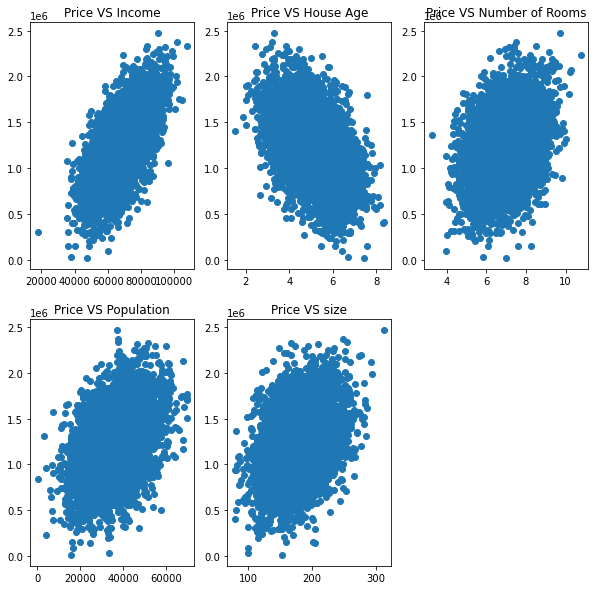

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
fig1 = plt.subplot(2,3,1)
plt.scatter(data.loc[:,'Avg. Area Income'],data.loc[:,'Price'])
plt.title('Price VS Income')

fig1 = plt.subplot(2,3,2)
plt.scatter(data.loc[:,'Avg. Area House Age'],data.loc[:,'Price'])
plt.title('Price VS House Age')

fig1 = plt.subplot(2,3,3)
plt.scatter(data.loc[:,'Avg. Area Number of Rooms'],data.loc[:,'Price'])
plt.title('Price VS Number of Rooms')

fig1 = plt.subplot(2,3,4)
plt.scatter(data.loc[:,'Area Population'],data.loc[:,'Price'])
plt.title('Price VS Population')

fig1 = plt.subplot(2,3,5)
plt.scatter(data.loc[:,'size'],data.loc[:,'Price'])
plt.title('Price VS size')
plt.show()

In [6]:
#定义x,y
X = data.loc[:,'size']
y = data.loc[:,'Price']

import numpy as np
X = np.array(X)
y = np.array(y)

X = X.reshape(-1,1)
y=y.reshape(-1,1)

X

array([[188.2142121],
       [160.0425258],
       [227.2735445],
       ...,
       [139.4917852],
       [184.845371 ],
       [148.5894227]])

In [7]:
#建立一个单一的模型
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()

In [8]:
#训练模型
#Expected 2D array, got 1D array instead:(需要对X,y进行转换)
LR1.fit(X,y)

LinearRegression()

In [9]:
#计算单因子的价格 price VS size
y_predict1 = LR1.predict(X)
y_predict1

array([[1276881.85636623],
       [1173363.58767144],
       [1420407.32457443],
       ...,
       [1097848.86467426],
       [1264502.88144558],
       [1131278.58816273]])

In [10]:
#评估模型表现
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error1 = mean_squared_error(y,y_predict1)
r2_score1 = r2_score(y,y_predict1)
mean_squared_error1,r2_score1

(108771672553.6264, 0.1275031240418234)

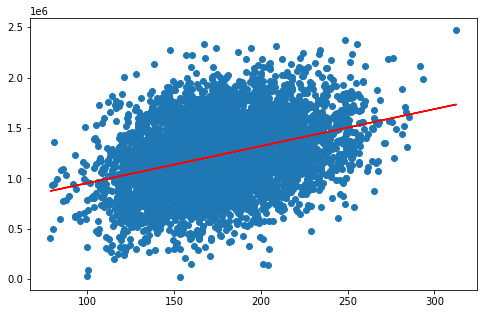

In [11]:
fig6 = plt.figure(figsize=(8,5))
plt.scatter(X,y)
plt.plot(X,y_predict1,'r')
plt.show()

In [12]:
#多因子分析

In [13]:
#定义 X_multi
#
X_multi = data.drop(['Price'],axis=1)
X_multi

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size
0,79545.45857,5.317139,7.009188,23086.80050,188.214212
1,79248.64245,4.997100,6.730821,40173.07217,160.042526
2,61287.06718,5.134110,8.512727,36882.15940,227.273545
3,63345.24005,3.811764,5.586729,34310.24283,164.816630
4,59982.19723,5.959445,7.839388,26354.10947,161.966659
...,...,...,...,...,...
4995,60567.94414,3.169638,6.137356,22837.36103,161.641403
4996,78491.27543,4.000865,6.576763,25616.11549,159.164596
4997,63390.68689,3.749409,4.805081,33266.14549,139.491785
4998,68001.33124,5.465612,7.130144,42625.62016,184.845371


In [14]:
#建立线性结构
LR_multi = LinearRegression()

In [17]:
#训练模型
X_multi.shape

(5000, 5)

In [18]:
LR_multi.fit(X_multi,y)

LinearRegression()

In [19]:
#模型的预测

In [21]:
y_predict_multi = LR_multi.predict(X_multi)
y_predict_multi

array([[1223968.89166087],
       [1497306.3318863 ],
       [1250884.31019438],
       ...,
       [1020693.92390375],
       [1260503.36914585],
       [1302737.7915763 ]])

In [22]:
from sklearn.metrics import mean_squared_error,r2_score

In [23]:
mean_squared_error_multi = mean_squared_error(y,y_predict_multi)
r2_score_multi = r2_score(y,y_predict_multi)
print(mean_squared_error_multi,r2_score_multi)

10219846512.17786 0.9180229195220739


In [24]:
#可视化


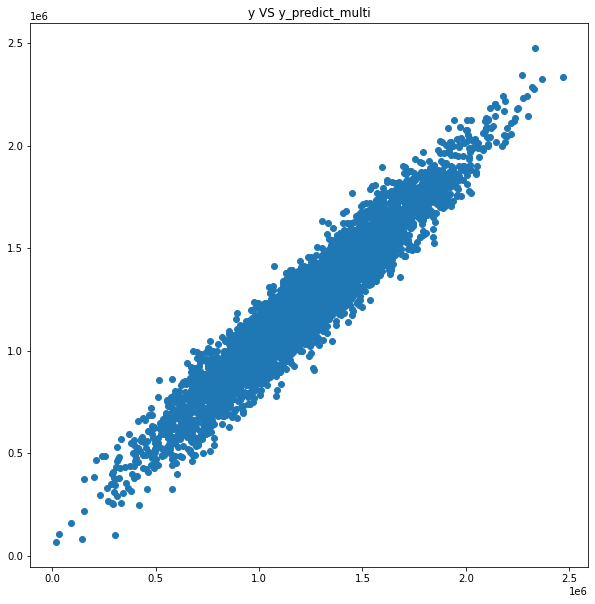

In [27]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.scatter(y,y_predict_multi)
plt.title('y VS y_predict_multi')
plt.show()

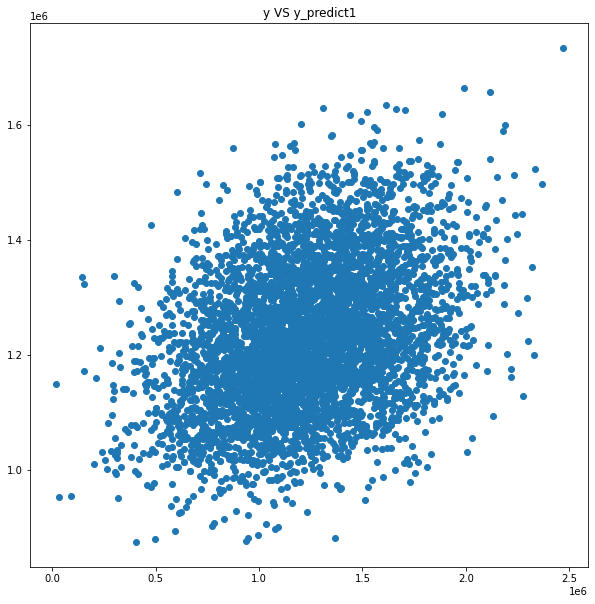

In [29]:
figs = plt.figure(figsize=(10,10))
plt.scatter(y,y_predict1)
plt.title('y VS y_predict1')
plt.show()

In [32]:
X_test = [65000,5,5,30000,200]
X_test = np.array(X_test).reshape(1,-1)
X_test

array([[65000,     5,     5, 30000,   200]])

In [33]:
y_test = LR_multi.predict(X_test)
y_test

D:\download\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[817052.19516298]])